## Imports and settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import scipy
import os
import glob
import seaborn as sns
import itertools
import gc
import time
import scienceplots
import sys
from nptdms import TdmsFile
from scipy import stats
from natsort import natsorted

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import seaborn as sns
from scipy.stats import norm
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline

sys.path.append('../utils/')
from utils.preprocessing import centimeter,one_column,two_column,cm_std,cm_bright,cm_highCon,cm_mark
np.random.seed(16)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["text.usetex"] = True
matplotlib.rcParams['figure.dpi'] = 300
plt.style.use(['science','nature'])
plt.rcParams['figure.constrained_layout.use'] = True
mpl.rcParams.update(two_column)

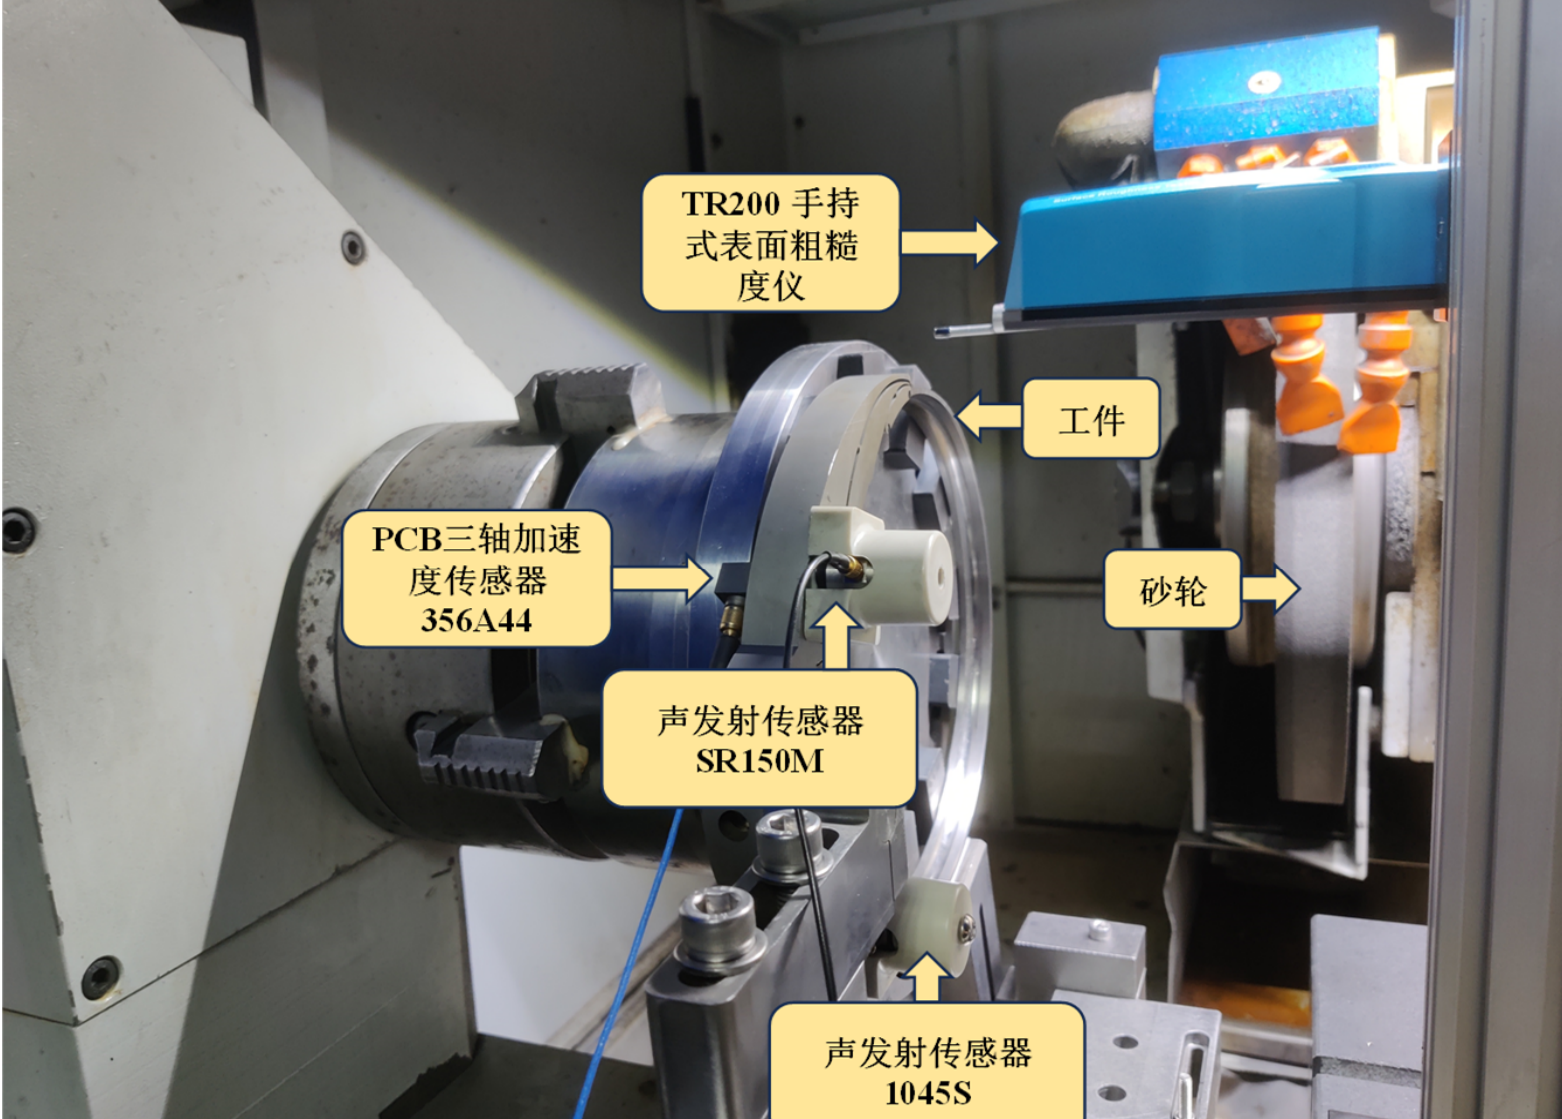

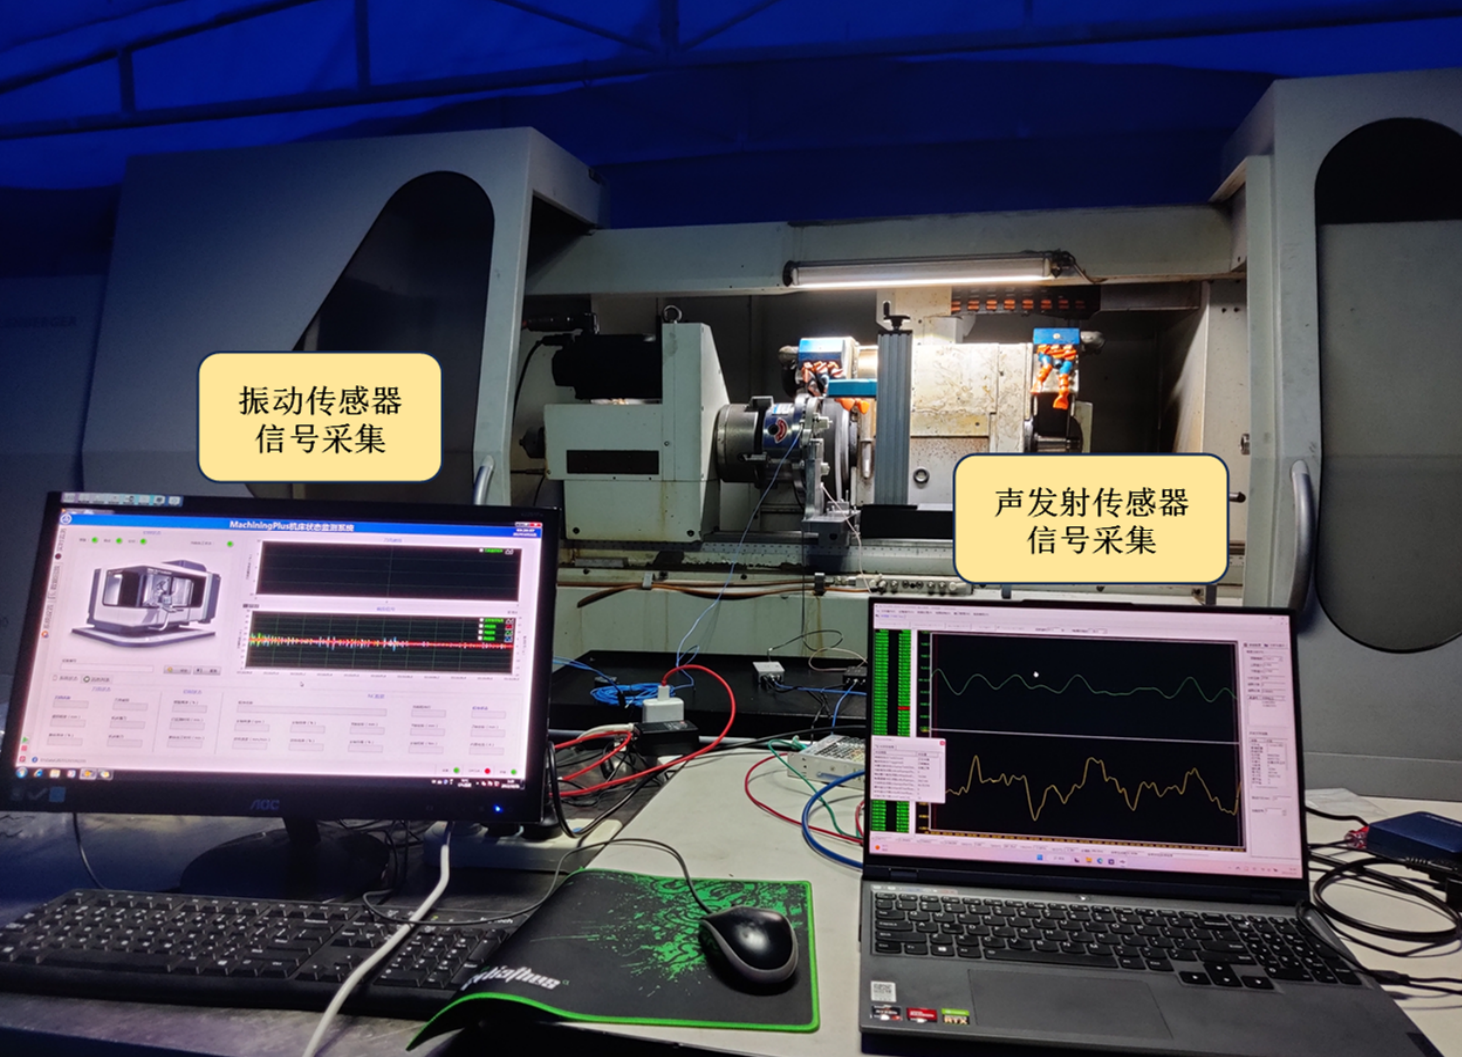

In [2]:
import sys
sys.path.append('./utils')
# from pydub import AudioSegment
import itertools
import string
import glob
import subprocess
import seedir
from utils.preprocessing import print_tdms_structure,check_identical_csv_lengths

alphabet = list(string.ascii_lowercase)
sampling_rate_ae = 4*1e6
sampling_rate_vib = 51.2*1e3

project_name = ["Grinding","XiAnJiaoTong"]

if os.name == 'posix':
    project_dir:str = os.path.join(
    subprocess.getoutput("echo $DATADIR"),
    *project_name,
    )
elif os.name == 'nt':
    project_dir:str = os.path.join(
    subprocess.getoutput("echo %datadir%"),
    *project_name
    )

dataDir_ae = os.path.join(project_dir,"AE")
dataDir_vib = os.path.join(project_dir,"Vibration")

In [3]:
df = pd.read_excel(os.path.join(project_dir,"parameters.xlsx"),index_col=0)
df.columns = ["Surface Speed","Workpiece rotation speed","Grinding Depth"]
df["Surface Speed"] = df["Surface Speed"].str.extract(r'(\d+)').astype(float) # mm/s
df["Workpiece rotation speed"] = df["Workpiece rotation speed"].str.extract(r'(\d+)').astype(float) # rpm
df["Grinding Depth"] = df["Grinding Depth"].str.extract(r'(\d+)').astype(float) # um
parameters = df.copy()
del df
parameters

Surface Speed  Workpiece rotation speed  Grinding Depth
No.                                                         
1             25.0                      20.0            20.0
2             25.0                      40.0            30.0
3             25.0                      60.0            40.0
4             25.0                      80.0            50.0
5             30.0                      40.0            40.0
6             30.0                      60.0            50.0
7             30.0                      80.0            20.0
8             30.0                      20.0            30.0
9             35.0                      60.0            50.0
10            35.0                      80.0            20.0
11            35.0                      20.0            30.0
12            35.0                      40.0            40.0
13            40.0                      80.0            30.0
14            40.0                      20.0            40.0
15            40.0                      40.0            50.0
16            40.0                      60.0            20.0

In [4]:
# file_names = [os.path.join(dataDir,str(i),f'{i}.TXT') for i in range(1,5)]
# file_names = [os.path.join(dataDir,f'{i}.TXT') for i in range(1,5)]
# sampling_rate = int(50*1e6)

ae_names = natsorted([os.path.join(dataDir_ae,i) for i in os.listdir(dataDir_ae) if os.path.splitext(i)[1] == '.txt'])
ae_names

['C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-01-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-02-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-03-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-04-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-05-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-06-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-07-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-08-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-09-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-10-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-11-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAnJiaoTong\\AE\\1-12-0.txt',
 'C:\\Users\\Public\\Documents\\Data\\Grinding\\XiAn

data_length = check_identical_csv_lengths(dataDir_ae,'txt')

```
File lengths are not identical.
File C:\Users\Public\Documents\Data\Grinding\XiAnJiaoTong\AE\1-02-0.txt has a different length (58605567) than the first file (61194239).
```

## File structure

In [5]:
seedir.seedir(dataDir_ae)

AE/
├─1-01-0.txt
├─1-02-0.txt
├─1-03-0.txt
├─1-04-0.txt
├─1-05-0.txt
├─1-06-0.txt
├─1-07-0.txt
├─1-08-0.txt
├─1-09-0.txt
├─1-10-0.txt
├─1-11-0.txt
├─1-12-0.txt
├─1-13-0.txt
├─1-14-0.txt
├─1-15-0.txt
├─1-16-0.txt
├─1-17-0.txt
├─1-18-0.txt
├─1-19-0.txt
├─1-20-0.txt
├─10-01-0.txt
├─10-02-0.txt
├─10-03-0.txt
├─10-04-0.txt
├─10-05-0.txt
├─10-06-0.txt
├─10-07-0.txt
├─10-08-0.txt
├─10-09-0.txt
├─10-10-0.txt
├─10-11-0.txt
├─10-12-0.txt
├─10-13-0.txt
├─10-14-0.txt
├─10-15-0.txt
├─10-16-0.txt
├─10-17-0.txt
├─10-18-0.txt
├─10-19-0.txt
├─10-20-0.txt
├─11-01-0.txt
├─11-02-0.txt
├─11-03-0.txt
├─11-04-0.txt
├─11-05-0.txt
├─11-06-0.txt
├─11-07-0.txt
├─11-08-0.txt
├─11-09-0.txt
├─11-10-0.txt
├─11-11-0.txt
├─11-12-0.txt
├─11-13-0.txt
├─11-14-0.txt
├─11-15-0.txt
├─11-16-0.txt
├─11-17-0.txt
├─11-18-0.txt
├─11-19-0.txt
├─11-20-0.txt
├─12-01-0.txt
├─12-02-0.txt
├─12-03-0.txt
├─12-04-0.txt
├─12-05-0.txt
├─12-06-0.txt
├─12-07-0.txt
├─12-08-0.txt
├─12-09-0.txt
├─12-10-0.txt
├─12-11-0.txt
├─12-12-0.txt
├─12-13-

## Data structure

In [6]:
df = pd.read_csv(ae_names[0],sep='\s',header=None)
df.head()

C:\Users\mingwucn\AppData\Local\Temp\ipykernel_27156\2372502461.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(ae_names[0],sep='\s',header=None)


0        1
0  0.04395 -1.16455
1  0.08545 -1.04736
2  0.11963 -0.92041
3  0.15381 -0.77881
4  0.19287 -0.62744

In [ ]:
_data = df[0][:50000]
_t = np.linspace(0,len(_data)/sampling_rate_ae*1e3,len(_data))
fig,ax = plt.subplots()
ax.plot(_t,_data,lw=0.5)
plt.show()

NameError: name 'df' is not defined

## Utilities

In [ ]:
# shift-mean
def getShiftMean(arr,windowWidth):
    _arr = arr[windowWidth:]
    for i in range(windowWidth-1):
        _arr = np.vstack([_arr,arr[i:i-windowWidth]])
    return np.mean(_arr,axis=0)

# slope
def getSlope(arr,windowWidth=5):
    assert len(arr)>(windowWidth+1)
    _arr0 = getShiftMean(arr[1:],windowWidth)
    _arr1 = getShiftMean(arr[:-1],windowWidth)
    return (_arr1-_arr0)/windowWidth

# Signal to noise ratio
def SNR(a,axis=0,ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

## Cycle definition

In [ ]:
data = pd.read_csv(file_names[1], delimiter = ',',header= None,names = ['A'])
data = data['A'].str.split('\t', expand = True, )
# start = time.time()
V_value = data.values[:,0].astype(float)
C_value = data.values[:,1].astype(float)
C_Label2 = C_value*C_value

In [ ]:
data.shape[0]/sampling_rate

0.1

In [ ]:
start_time = time.time()

# Value and definition
C_Mean = C_Label2[:50].mean()
Power = abs(V_value*C_value)
W = 15

dall = [[V_value[i],C_value[i],0] for i in range(W)]
dtemp = [[V_value[i],C_value[i],0] for i in range(W)]

# Initialize
## index and count
Discharge_index = 0
Oscillation_index = 0
End_index = 0
Discharge_Count = 0

## time
Pulse_Time = 0
Charging_Time = 0
Discharge_Time_all = 0
Discharge_Time = 0
Oscillation_Time = 0

## energy
Discharge_Energy_all = 0
Discharge_Energy_Discharge = 0
Discharge_Energy_Oscillation = 0
Discharge_Point_Power = 0

## list
Pulse_Time_list = []
Charging_Time_list = []
Discharge_Time_all_list = []
Discharge_Time_list = []
Oscillation_Time_list = []

Discharge_Energy_all_list = []
Discharge_Energy_Discharge_list = []
Discharge_Energy_Oscillation_list = []
Discharge_Point_Power_list = []

# for i in range(W, 1000000):
for i in range(W,int((len(C_Label2)-W)*0.1)):
    
    # Discharge begin
    if C_Label2[i-W:int(i+W*0.2)].max() > C_Mean*100:
        
        # Label k : Discharge = 1, Oscillation = 0.5    
        k = 1 if Oscillation_index < Discharge_index else 0.5
        
        # List append
        dtemp.append([V_value[i],C_value[i],k])
        dall.append([V_value[i],C_value[i],k])

        # Get discharge index
        Discharge_index = i if Discharge_index == 0 else Discharge_index       
        
#         dtemp.append([V_value[i],C_value[i],1])
#         dall.append([V_value[i],C_value[i],1])
        
       
        # Oscillation begin, Discharging point detection, V_value.min()
#         if Power[i-2] == Power[Discharge_index:i+50].max() and Discharge_index != 0:
        if C_value[i-2] == C_value[Discharge_index:i+50].max() and Discharge_index != 0:
            # Get oscillation index
            Oscillation_index = i
            Discharge_Energy_Discharge = Power[Discharge_index:Oscillation_index].sum()

        # Energy  
        Discharge_Energy_all += Power[i]

    else:
#         # Get End index
#         End_index = i if i > n+2 else 0
        #Discharge end
        if Discharge_Energy_all >0:
            # Get end index
            End_index = i
            
            # Energy and power
            C_Discharge = C_value[Discharge_index:End_index]
            Discharge_point_index = int(np.where(C_value[Discharge_index:End_index]==np.max(C_Discharge))[0][0])
        
            Discharge_Point_Power = abs(C_value[Discharge_point_index]*V_value[Discharge_point_index])
            
            Discharge_Energy_Oscillation = Power[Oscillation_index:End_index-1].sum()
            
            # Time
            Discharge_Time_all = End_index - Discharge_index
            Discharge_Time = Oscillation_index - Discharge_index
            Oscillation_Time = End_index - Oscillation_index
            
            # Get pulse time and charging time
            Pulse_Time = len(dtemp)
            Charging_Time = Pulse_Time - Discharge_Time_all
            
            # List append
            globals()['dfT' + '_' + str(Discharge_Count)] = np.array(dtemp)
            
            Discharge_Energy_all_list.append(Discharge_Energy_all)
            Discharge_Energy_Discharge_list.append(Discharge_Energy_Discharge)       
            Discharge_Energy_Oscillation_list.append(Discharge_Energy_Oscillation)
            Discharge_Point_Power_list.append(Discharge_Point_Power)
            
            Pulse_Time_list.append(Pulse_Time)
            Charging_Time_list.append(Charging_Time)
            Discharge_Time_all_list.append(Discharge_Time_all)
            Discharge_Time_list.append(Discharge_Time)
            Oscillation_Time_list.append(Oscillation_Time)
        
            # Initialize

            Discharge_Count += 1
            dtemp = []
            
            # Initialize
            ## index and count
            Discharge_index = 0
            Oscillation_index = 0
            End_index = 0

            ## time
            Discharge_Time_all = 0
            Discharge_Time = 0
            Oscillation_Time = 0

            ## energy
            Discharge_Energy_all = 0
            Discharge_Energy_Discharge = 0
            Discharge_Energy_Oscillation = 0

        dall.append([V_value[i],C_value[i],0])
        dtemp.append([V_value[i],C_value[i],0])
            
dall = np.array(dall)
Label_SM = dall[:,2]
print('  Completed in'.rjust(23, ' '), '%s s'.ljust(5, ' ') % round(time.time() - start_time, 2))
Discharge_Count

           Completed in 6.51 s 


454

## Visualization 

In [ ]:
plt.rcParams.update(one_column)
plt.rcParams.update({'text.usetex':False})
sampling_rate = 100*1e6

C:\Users\mingwucn\AppData\Local\Temp\ipykernel_3656\3307660149.py:76: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0)


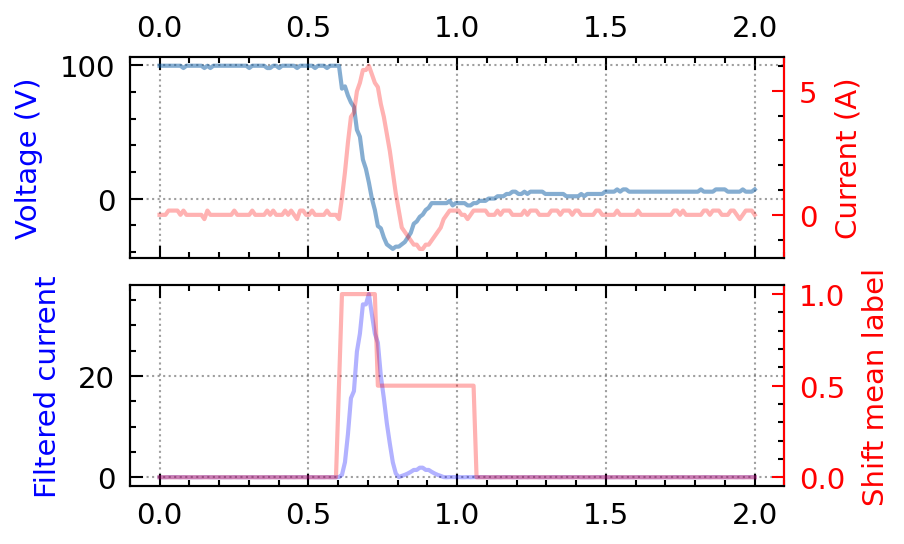

In [ ]:
i=15800
_duration=200

plt.subplots(figsize=(3,1.8))
ax = plt.gca()
ax.set_axis_off()
ax1 = plt.subplot2grid((2,1),(0,0),rowspan=1, colspan=1)
ax3 = plt.subplot2grid((2,1),(1,0),rowspan=1, colspan=1)

# ax2.plot(C_Label2[:330],alpha =0.5,color='r')


ax2 = ax1.twinx()
ax4 = ax3.twinx()

_len = len(V_value[i:i+_duration])
_t = np.linspace(0,_len/sampling_rate*1e6,_len)

# V
ax1.plot(_t, V_value[i:i+_duration],alpha = 0.5,label = 'Voltage')
ax1.plot([],alpha = 0.3,color = 'r',label = 'Current')
# C
ax2.plot(_t, C_value[i:i+_duration],alpha = 0.3,color = 'r',label = 'Current')
# FFT
ax3.plot(_t, C_Label2[i:i+_duration],label = '$\mathrm{(Current-FFt)^2}$',alpha = 0.3,color = 'b')
ax3.plot([],alpha = 0.3,color = 'r',label = 'Shift mean label')
# Shift Mean label
ax4.plot(_t, Label_SM[i:i+_duration],alpha = 0.3,color = 'r',linewidth=1,label = 'Noise Filter')  


# ax3.plot(C_Label2[i:i+1500]*8,alpha = 0.2,linewidth=3,label = '$\mathregular{(Current-FFt)^2}$',color = 'r')  
# ax3.plot([],label = '$\mathregular{(Current-FFt)^2}$',alpha = 0.5,color = 'r')

####### Y Label
ax1.set_ylabel('Voltage (V)',color ='b')

ax2.set_ylabel('Current (A)',color ='r')

# ax3.set_ylabel('$\mathrm{(Current-FFt)^2}$',color ='b')
ax3.set_ylabel('Filtered current',color ='b')


ax4.set_ylabel('Shift mean label',color ='r')

# Ylim
# ax3.set_ylim(-0.2)


# plt.xticks(np.arange(-5, 5, 0.5))

###### Grid
ax1.grid(linestyle=":", linewidth=0.5, color='.25', zorder=-10,alpha=0.5)
ax3.grid(linestyle=":", linewidth=0.5, color='.25', zorder=-10,alpha=0.5)


# plt.plot(Labels[230:330]*100,alpha = 0.5,label = 'Current2 - FFt')

###### Tick

ax2.spines['right'].set_color('red')
ax4.spines['right'].set_color('red')


ax2.tick_params(color='red',labelcolor='red')
ax4.tick_params(color='red',labelcolor='red')

ax1.tick_params(direction = 'in',top=True,labeltop=True,labelbottom=False)
ax3.tick_params(direction = 'in',top=True,labeltop=False,labelbottom=True)


##### Legend

# ax1.legend(loc='best',fontsize='medium', background='K')
# ax3.legend(loc='best',fontsize='medium', background='K')

plt.subplots_adjust(hspace=0)
# plt.plot(C_LabelNF[:330])
plt.savefig(f"CIRP CMMO 2025/image/raw_cycle_definition_{i}.png",dpi=600)

C:\Users\mingwucn\AppData\Local\Temp\ipykernel_3656\954116788.py:73: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0)


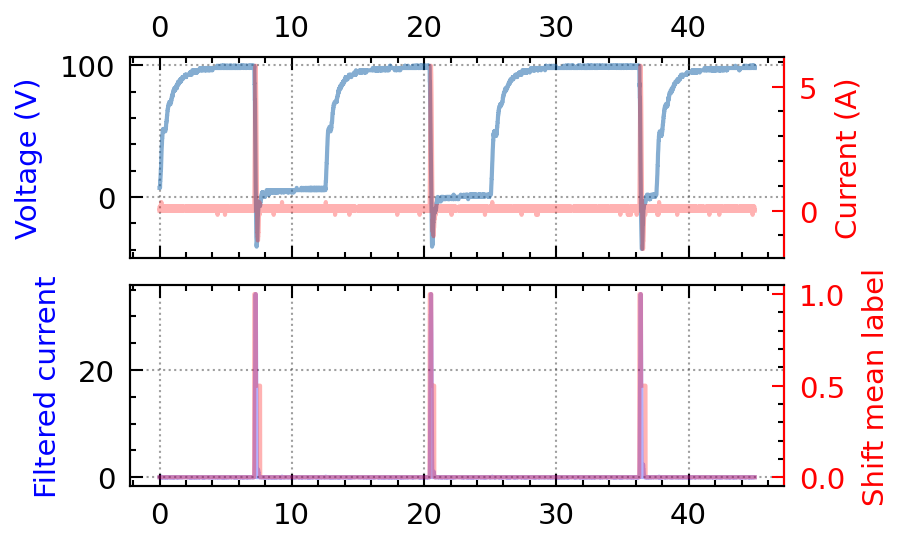

In [ ]:
i=37500
_duration = 4500

plt.subplots(figsize=(3,1.8))
ax = plt.gca()
ax.set_axis_off()
ax1 = plt.subplot2grid((2,1),(0,0),rowspan=1, colspan=1)
ax3 = plt.subplot2grid((2,1),(1,0),rowspan=1, colspan=1)

# ax2.plot(C_Label2[:330],alpha =0.5,color='r')


ax2 = ax1.twinx()
ax4 = ax3.twinx()

# time
_len = len(V_value[i:i+_duration])
_t = np.linspace(0,_len/sampling_rate*1e6,_len)
# V
ax1.plot(_t, V_value[i:i+_duration],alpha = 0.5,label = 'Voltage',lw=1)
ax1.plot([],alpha = 0.3,color = 'r',label = 'Current',lw=1)
# C
ax2.plot(_t, C_value[i:i+_duration],alpha = 0.3,color = 'r',label = 'Current')
# FFT
ax3.plot(_t, C_Label2[i:i+_duration],label = '$f(Current)$',alpha = 0.3,color = 'b')
ax3.plot([],alpha = 0.3,color = 'r',label = 'Shift mean label')
# Shift Mean label
ax4.plot(_t, Label_SM[i:i+_duration],alpha = 0.3,color = 'r',linewidth=1,label = 'Noise Filter')  


# ax3.plot(C_Label2[i:i+1500]*8,alpha = 0.2,linewidth=3,label = '$\mathregular{(Current-FFt)^2}$',color = 'r')  
# ax3.plot([],label = '$\mathregular{(Current-FFt)^2}$',alpha = 0.5,color = 'r')

####### Y Label
ax1.set_ylabel('Voltage (V)',color ='b')

ax2.set_ylabel('Current (A)',color ='r')

ax3.set_ylabel('Filtered current',color ='b')


ax4.set_ylabel('Shift mean label',color ='r')

# ax2.set_ylim(-0.05,0.2)


# plt.xticks(np.arange(-5, 5, 0.5))

###### Grid
ax1.grid(linestyle=":", linewidth=0.5, color='.25', zorder=-10,alpha=0.5)
ax3.grid(linestyle=":", linewidth=0.5, color='.25', zorder=-10,alpha=0.5)


# plt.plot(Labels[230:330]*100,alpha = 0.5,label = 'Current2 - FFt')

###### Tick

ax2.spines['right'].set_color('red')
ax4.spines['right'].set_color('red')

ax2.tick_params(color='red',labelcolor='red')
ax4.tick_params(color='red',labelcolor='red')

ax1.tick_params(direction = 'in',top=True,labeltop=True,labelbottom=False)
ax3.tick_params(direction = 'in',top=True,labeltop=False,labelbottom=True)


##### Legend

# ax1.legend(loc='best',fontsize='large' )
# ax3.legend(loc='best',fontsize='large' )

plt.subplots_adjust(hspace=0)
# plt.plot(C_LabelNF[:330])
plt.savefig(f"CIRP CMMO 2025/image/raw_cycle_definition_{i}.png",dpi=600)

#### Evaluate the window size by signal to noise ratio

Signal to noise ratio

$$
SNR = P_{signal}/P_{noise} = \mu/\sigma
$$

where

- $P_{signal}$ denotes the signal’s power, the population mean
- $P_{noise}$ denotes the power of noise, the standard deviation of data

In [ ]:
SNR_list = []
for i in (range(10)):
    _slope = getSlope(V_value,i+2)
    _SNR = float(SNR(_slope))
    SNR_list.append(_SNR)

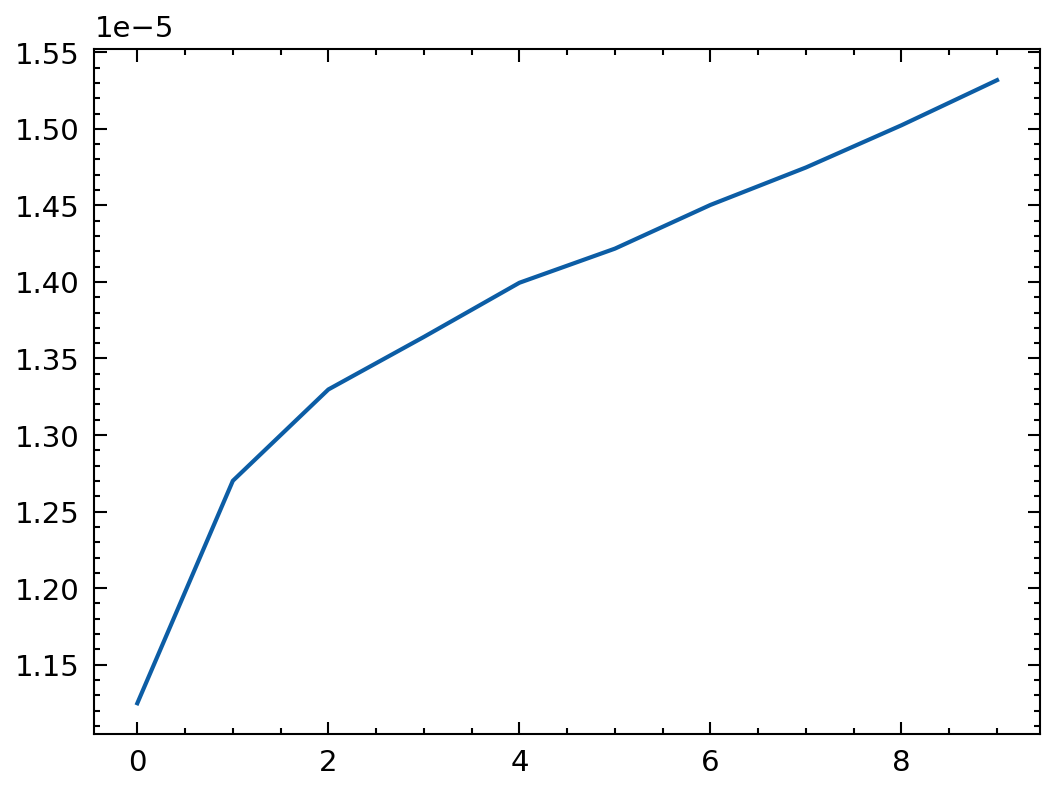

In [ ]:
plt.plot(SNR_list)
plt.show()